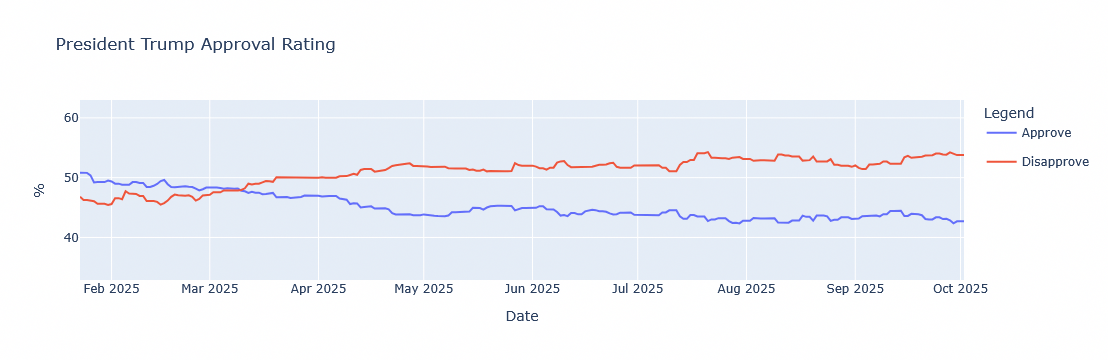

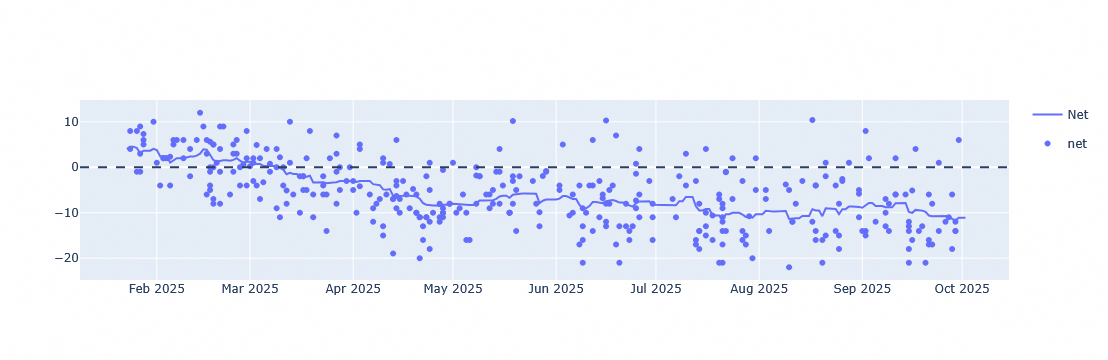

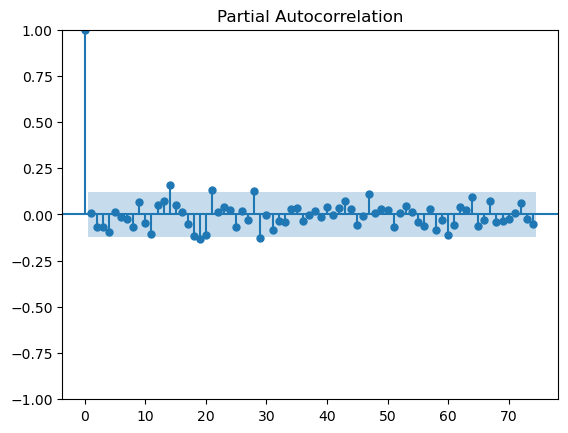

100%|████████████████████████████████████████████████████████████████████████████████| 248/248 [00:09<00:00, 26.60it/s]


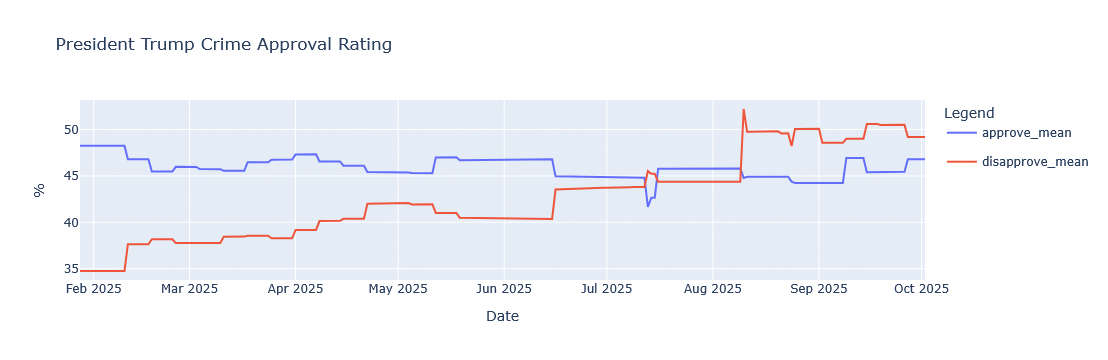

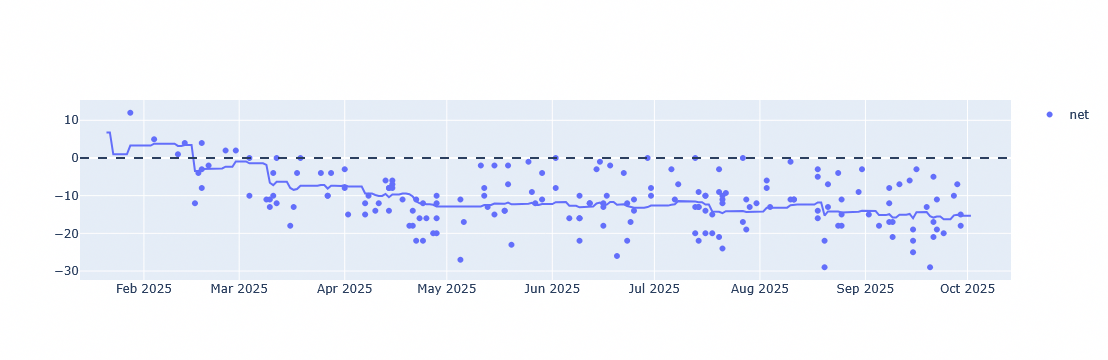

100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:14<00:00, 17.38it/s]


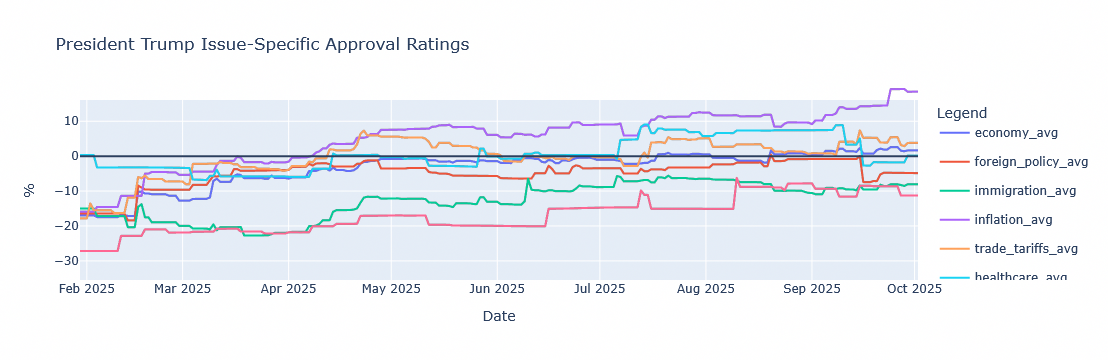

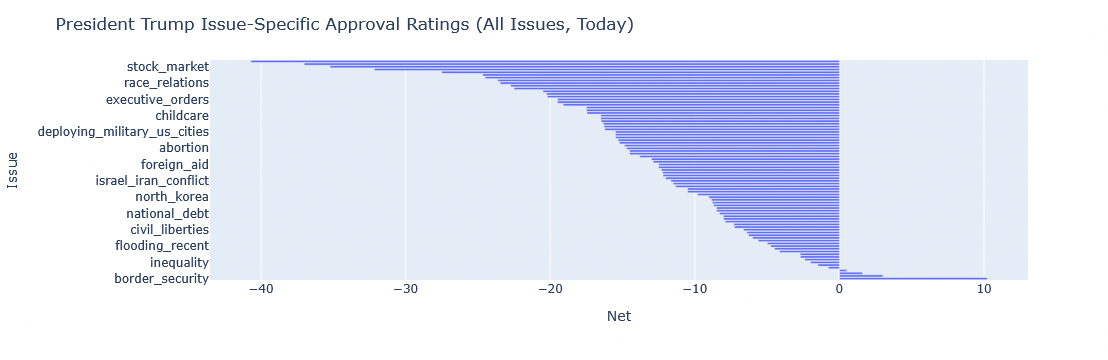

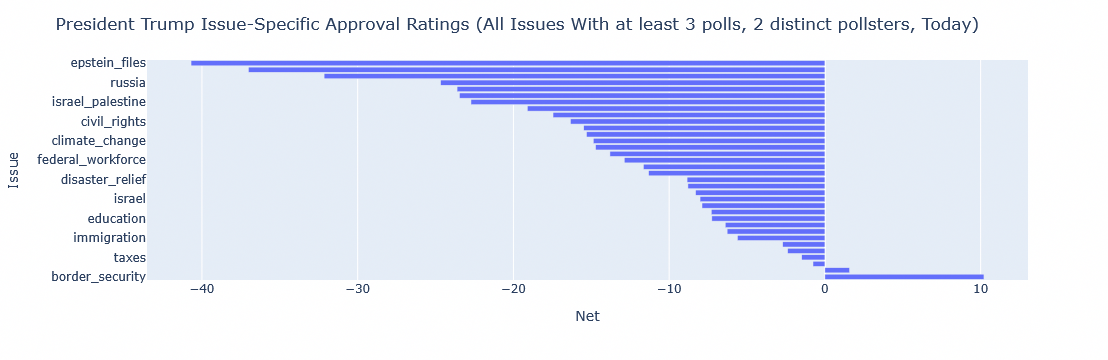

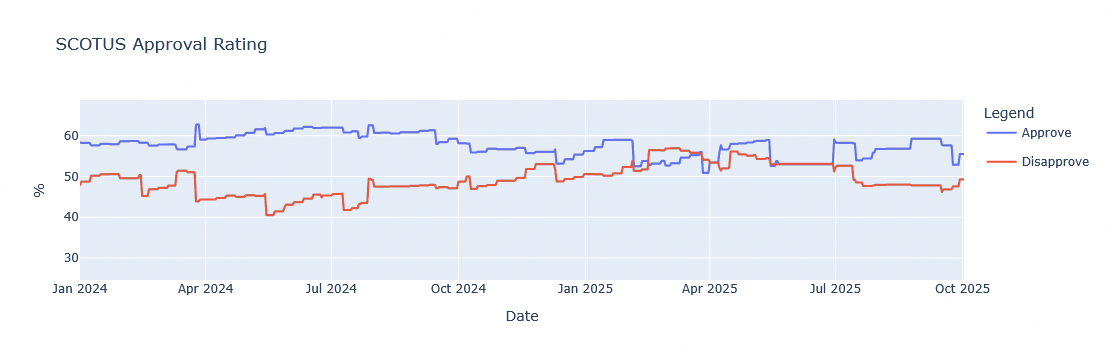

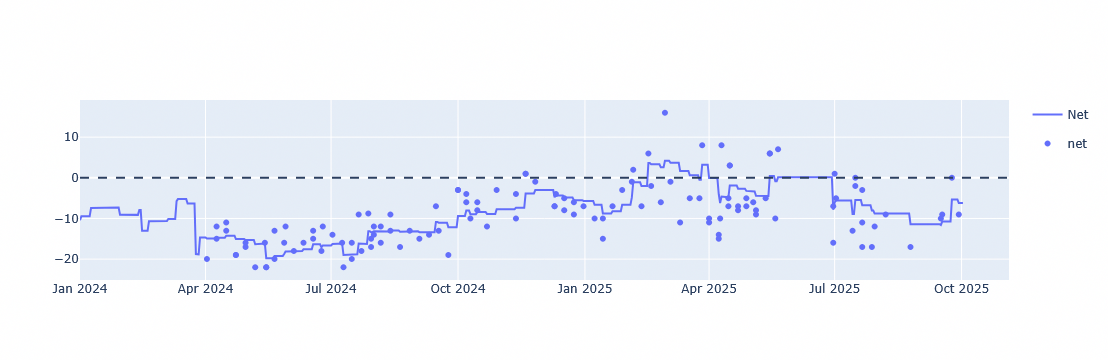

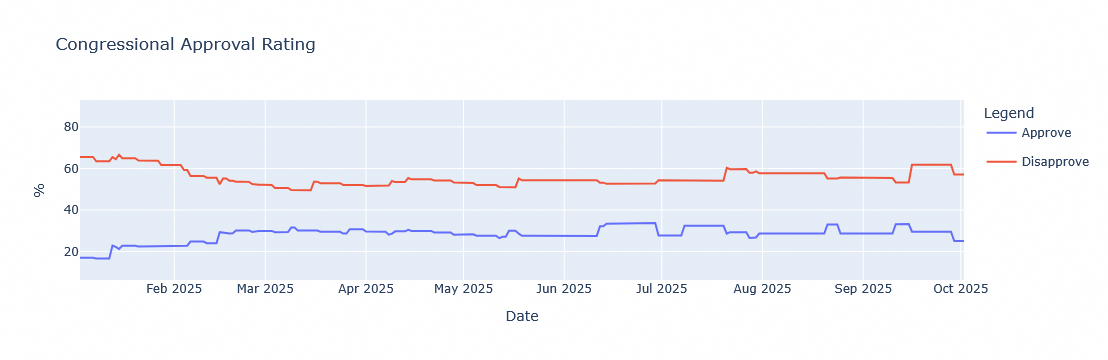

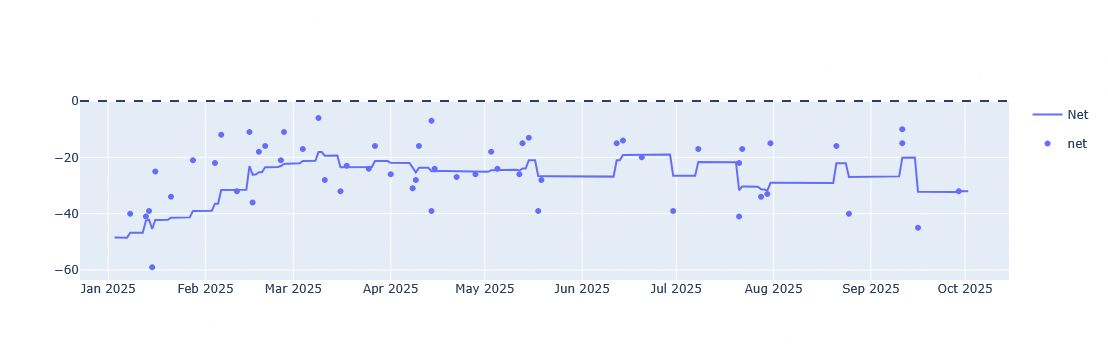

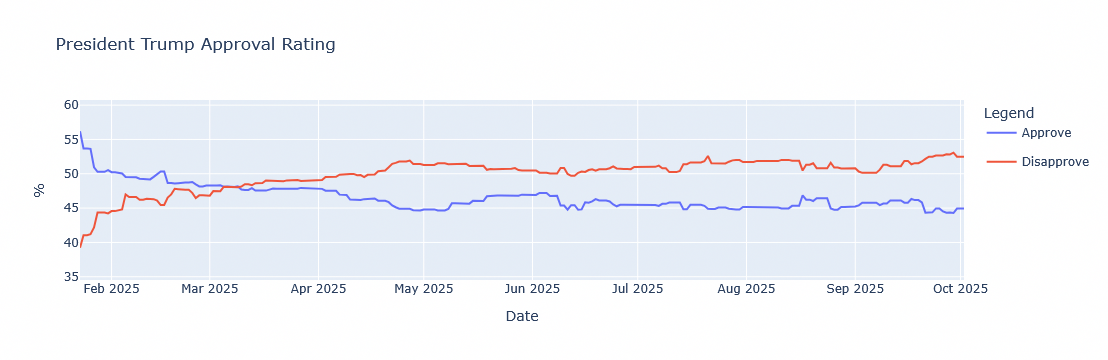

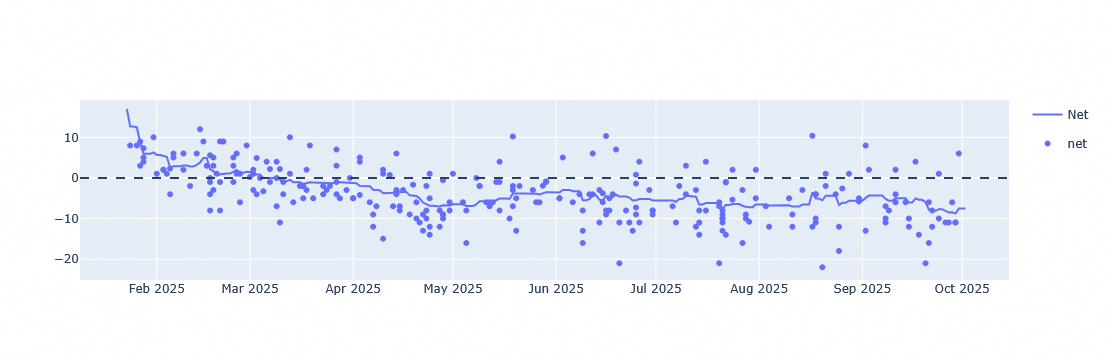

In [101]:
%run ./president-approval.ipynb
%run ./president-issue-approval.ipynb
%run ./scotus-approval.ipynb
%run ./congress-approval.ipynb
%run ./generic-ballot.ipynb
%run ./congress-scotus-table-combined.ipynb
%run ./president-approval-RV.ipynb

In [102]:
# !pip install --force-reinstall "numpy<2.0"

In [103]:
from time import sleep
from tqdm import tqdm

In [104]:
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials

from keys import GOOG_API_KEY

In [105]:
# Define the scope
scopes = [
    "https://www.googleapis.com/auth/spreadsheets",
    "https://www.googleapis.com/auth/drive"
]

# Authenticate with the service account
credentials = Credentials.from_service_account_file(
    GOOG_API_KEY,
    scopes=scopes
)

# Authorize gspread
client = gspread.authorize(credentials)

In [106]:
spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("approval-stats")
worksheet.clear()

approval_stats = pd.read_csv('approval_stats.csv')
set_with_dataframe(worksheet, approval_stats)

In [107]:
# spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("polls_display_table")
worksheet.clear()

approval_stats = pd.read_csv('polls_display_table.csv')
set_with_dataframe(worksheet, approval_stats)

In [108]:
for issue in ['econ', 'imm', 'infl', 'trade', 'fp', 'healthcare', 'crime']:
    # spreadsheet = client.open("snoutcounter-data")
    worksheet = spreadsheet.worksheet(f"approval_stats_{issue}")
    worksheet.clear()

    approval_stats = pd.read_csv(f'approval_stats_{issue}.csv')
    set_with_dataframe(worksheet, approval_stats)

In [109]:
# spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("polls_display_issues")
worksheet.clear()

approval_stats = pd.read_csv('polls_display_issues.csv')
set_with_dataframe(worksheet, approval_stats)

In [110]:
for inst in ['congress', 'scotus']:
    # spreadsheet = client.open("snoutcounter-data")
    worksheet = spreadsheet.worksheet(f"{inst}_approval_stats")
    worksheet.clear()

    approval_stats = pd.read_csv(f'{inst}_approval_stats.csv')
    set_with_dataframe(worksheet, approval_stats)

In [111]:
# spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("generic_ballot_stats")
worksheet.clear()

approval_stats = pd.read_csv('generic_ballot_stats.csv')
set_with_dataframe(worksheet, approval_stats)

In [112]:
for inst in ['congress_scotus', 'generic_ballot']:
    # spreadsheet = client.open("snoutcounter-data")
    worksheet = spreadsheet.worksheet(f"{inst}_polls_display_table")
    worksheet.clear()

    approval_stats = pd.read_csv(f'{inst}_polls_display_table.csv')
    set_with_dataframe(worksheet, approval_stats)

In [113]:
# spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("net_approval_issues")
worksheet.clear()

approval_stats = pd.read_csv('net_approval_issues.csv')
set_with_dataframe(worksheet, approval_stats)

In [114]:
# spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("net_approval")
worksheet.clear()

approval_stats = pd.read_csv('net_approval.csv')
set_with_dataframe(worksheet, approval_stats)

In [115]:
# spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("net_generic_ballot")
worksheet.clear()

approval_stats = pd.read_csv('net_generic_ballot.csv')
set_with_dataframe(worksheet, approval_stats)

In [116]:
worksheet = spreadsheet.worksheet("indiv_pollster_avgs")
worksheet.clear()

approval_stats = pd.read_csv('indiv_pollster_avgs.csv')
set_with_dataframe(worksheet, approval_stats)

In [117]:
# Registered voters only polls for presidential approval
spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("approval_stats_RV")
worksheet.clear()

approval_stats = pd.read_csv('approval_stats_RV.csv')
set_with_dataframe(worksheet, approval_stats)

In [118]:
# spreadsheet = client.open("snoutcounter-data")
worksheet = spreadsheet.worksheet("polls_display_table_RV")
worksheet.clear()

approval_stats = pd.read_csv('polls_display_table_RV.csv')
set_with_dataframe(worksheet, approval_stats)

In [121]:
# spreadsheet = client.open("snoutcounter-data")
# from time import sleep
for i in tqdm(range(200)):
    sleep(1)
worksheet = spreadsheet.worksheet("net_approval_RV")
worksheet.clear()

approval_stats = pd.read_csv('net_approval_RV.csv')
set_with_dataframe(worksheet, approval_stats)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [03:20<00:00,  1.00s/it]


APIError: APIError: [429]: Quota exceeded for quota metric 'Write requests' and limit 'Write requests per minute per user' of service 'sheets.googleapis.com' for consumer 'project_number:382361870111'.